In [1]:
## animate Electric field  

%pylab tk
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from ReadBinary import *

font = {'family' : 'serif', 'weight' : 'normal', 'size' : 14}
matplotlib.rc('font', **font)

fileSuffix = "-rot=0-theta=0-fp=4-gamma=1-pitch=124-fwhmToPitch=0.435483873-swithTime=0.100000001-res=50"
folder = "../data/LargePeriodicLattice-GaussianPlasma-TimeSwitched/"

filename_E = folder+"E-x{}.data".format(fileSuffix)
filename_Wp2 = folder+"Wp2-x{}.data".format(fileSuffix)
arrayInfo = GetArrayInfo(filename_E)

print("typeCode: ", arrayInfo["typeCode"])
print("typeSize: ", arrayInfo["typeSize"])
print("shape: ", arrayInfo["shape"])
print("numOfArrays: ", arrayInfo["numOfArrays"])

E = GetArrays(filename_E, indStart=0, indEnd=None)[:, 0, :, :]
Wp2 = GetArrays(filename_Wp2, indStart=0, indEnd=None)[:, 0, :, :]
print("shape: ", E.shape)

assert E.shape == Wp2.shape

shape = E.shape[1:]
print("Max E: ", np.max(np.abs(E)))

plt.imshow(np.real(Wp2[-1, :,:]), cmap="rainbow", origin='lower', aspect='auto')
plt.show()

animate = False
save_animation = False

if animate:
    def animate_E(n):
        plt.clf()
        fig = plt.imshow(np.real(E[n, :,:]), cmap="rainbow", origin='lower', aspect='auto')
        plt.colorbar()
        plt.contour(np.real(Wp2[n, :,:]), cmap="Greys", linewidths=0.5, levels = 20)
        plt.xticks([])
        plt.yticks([])
        plt.pause(0.05)
        
        return fig
    
    if not save_animation:
        plt.ion()
        plt.figure(figsize=(7,6*(shape[0]/shape[1])))

        for n in range(E.shape[0]):
            animate_E(n)
    else:
        fig = plt.figure(figsize=(7,6*(shape[0]/shape[1])))
        anim = animation.FuncAnimation(fig, animate_E, frames=E.shape[0], interval=1, repeat=False)
        anim.save(folder + 'Efield-anim.mp4', writer="ffmpeg", fps=15, dpi=200)


Populating the interactive namespace from numpy and matplotlib
typeCode:  1
typeSize:  4
shape:  (1, 600, 600)
numOfArrays:  61
shape:  (61, 600, 600)
Max E:  2.0291526


Populating the interactive namespace from numpy and matplotlib


/home/nima/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


shape:  (2533, 701, 1)


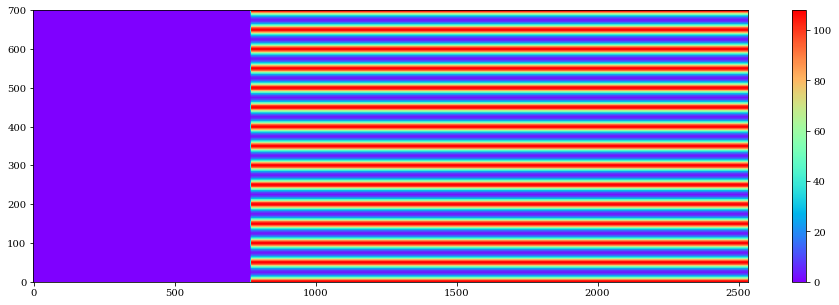

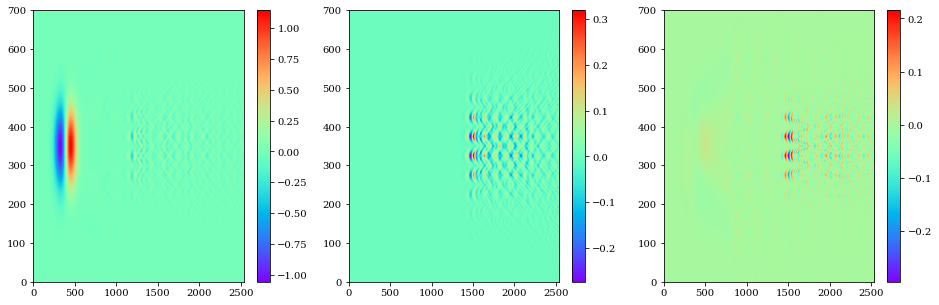

ind_t_start :  1401


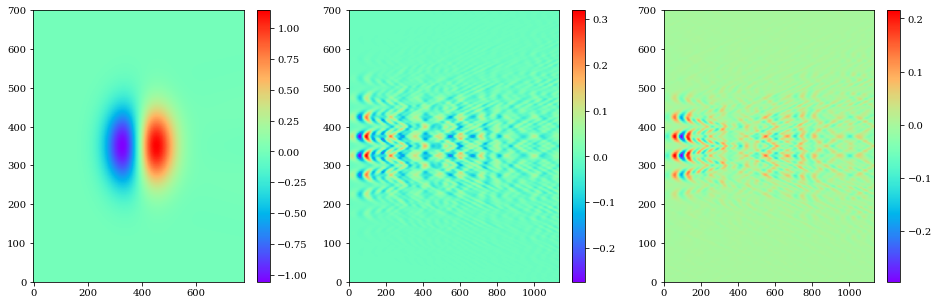

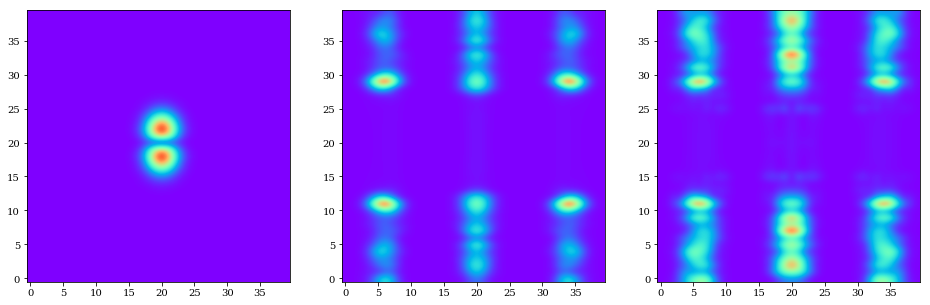

In [29]:
%pylab inline

figsize(16, 5)

wp2 = GetArrays(folder+"Wp2-slice-x{}.data".format(fileSuffix), indStart=0, indEnd=None)[:, 0, :, :]
Ei = GetArrays(folder+"Ei-x-slice{}.data".format(fileSuffix), indStart=0, indEnd=None)[:, 0, :, :]
Et = GetArrays(folder+"Et-x-slice{}.data".format(fileSuffix), indStart=0, indEnd=None)[:, 0, :, :]
Er = GetArrays(folder+"Er-x-slice{}.data".format(fileSuffix), indStart=0, indEnd=None)[:, 0, :, :]
print("shape: ", Et.shape)


shape = Et.shape[1:]
wp2_ty = wp2[:, :, 0]
wp2_t = np.sum(wp2_ty, axis=1)
ind_switch = np.argmax(wp2_t)
Ei_ty = Ei[:, :, 0]
Et_ty = Et[:, :, 0]
Er_ty = Er[:, :, 0]

plt.imshow(np.real(wp2_ty).T, cmap="rainbow", origin='lower', aspect='auto')
plt.colorbar()
plt.show()

plt.subplot(131)
plt.imshow(np.real(Ei_ty).T, cmap="rainbow", origin='lower', aspect='auto')
plt.colorbar()
plt.subplot(132)
plt.imshow(np.real(Et_ty).T, cmap="rainbow", origin='lower', aspect='auto')
plt.colorbar()
plt.subplot(133)
plt.imshow(np.real(Er_ty).T, cmap="rainbow", origin='lower', aspect='auto')
plt.colorbar()
plt.show()

ind_t_start = np.argmax(np.abs(np.sum(Et_ty, axis=1)) > 0.1*np.max(np.abs(np.sum(Et_ty, axis=1))))
print("ind_t_start : ", ind_t_start)

N_pts = 20
Ei_ty_chopped = Ei_ty[:ind_switch, :]
Et_ty_chopped = Et_ty[ind_t_start:, :]
Er_ty_chopped = Er_ty[ind_t_start:, :]

plt.subplot(131)
plt.imshow(np.real(Ei_ty_chopped).T, cmap="rainbow", origin='lower', aspect='auto')
plt.colorbar()
plt.subplot(132)
plt.imshow(np.real(Et_ty_chopped).T, cmap="rainbow", origin='lower', aspect='auto')
plt.colorbar()
plt.subplot(133)
plt.imshow(np.real(Er_ty_chopped).T, cmap="rainbow", origin='lower', aspect='auto')
plt.colorbar()
plt.show()


Nt_i, Ny = Ei_ty_chopped.shape
Nt_tr = Et_ty_chopped.shape[0]
Ei_f_ty = np.fft.fftshift(np.fft.fft2(Ei_ty_chopped))[Nt_i//2-N_pts:Nt_i//2+N_pts, Ny//2-N_pts:Ny//2+N_pts]
Et_f_ty = np.fft.fftshift(np.fft.fft2(Et_ty_chopped))[Nt_tr//2-N_pts:Nt_tr//2+N_pts, Ny//2-N_pts:Ny//2+N_pts]
Er_f_ty = np.fft.fftshift(np.fft.fft2(Er_ty_chopped))[Nt_tr//2-N_pts:Nt_tr//2+N_pts, Ny//2-N_pts:Ny//2+N_pts]

interpolation="bicubic"
plt.subplot(131)
plt.imshow(np.abs(Ei_f_ty), cmap="rainbow", origin='lower', aspect='auto', interpolation=interpolation)
plt.subplot(132)
plt.imshow(np.abs(Et_f_ty), cmap="rainbow", origin='lower', aspect='auto', interpolation=interpolation)
plt.subplot(133)
plt.imshow(np.abs(Er_f_ty), cmap="rainbow", origin='lower', aspect='auto', interpolation=interpolation)
plt.show()


Populating the interactive namespace from numpy and matplotlib


/home/nima/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


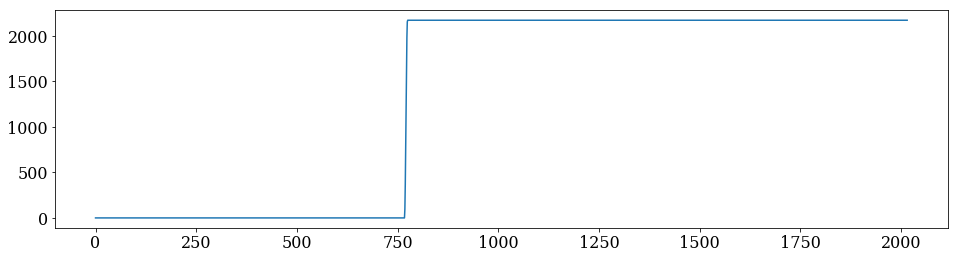

ind_switch :  775


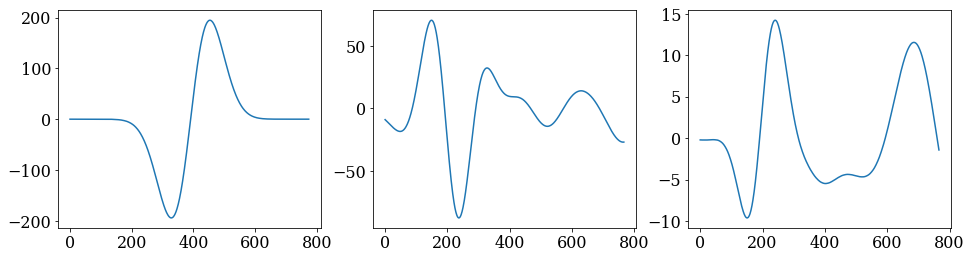

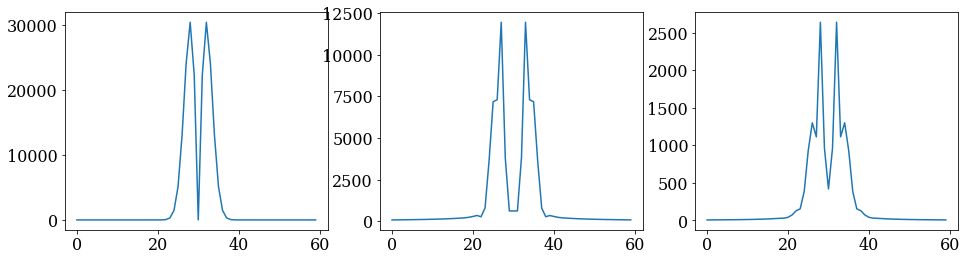

In [26]:
%pylab inline

font = {'family' : 'serif', 'weight' : 'normal', 'size' : 16}
matplotlib.rc('font', **font)

figsize(16, 4)


wp2_t = np.sum(wp2_ty, axis=1)#[600:650]
plt.plot(wp2_t)
plt.show()

ind_switch = np.argmax(wp2_t)

print("ind_switch : ", ind_switch)

plt.subplot(131)
Ei_t = np.sum(Ei_ty, axis=1)[:ind_switch]
plt.plot(Ei_t)
plt.subplot(132)
Et_t = np.sum(Et_ty, axis=1)[ind_t_start:]
plt.plot(Et_t)
plt.subplot(133)
Er_t = np.sum(Er_ty, axis=1)[ind_t_start:]
plt.plot(Er_t)
plt.show()

N_pts = 30

Nt = len(Ei_t)
plt.subplot(131)
Ei_f_t = np.fft.fftshift(np.fft.fft(Ei_t))[Nt//2-N_pts:Nt//2+N_pts]
plt.plot(np.abs(Ei_f_t))
Nt = len(Et_t)
plt.subplot(132)
Et_f_t = np.fft.fftshift(np.fft.fft(Et_t))[Nt//2-N_pts:Nt//2+N_pts]
plt.plot(np.abs(Et_f_t))
plt.subplot(133)
Er_f_t = np.fft.fftshift(np.fft.fft(Er_t))[Nt//2-N_pts:Nt//2+N_pts]
plt.plot(np.abs(Er_f_t))
plt.show()


dtype =  f
dt :  0.013435029424726963
unitLength :  0.00012399999832268804


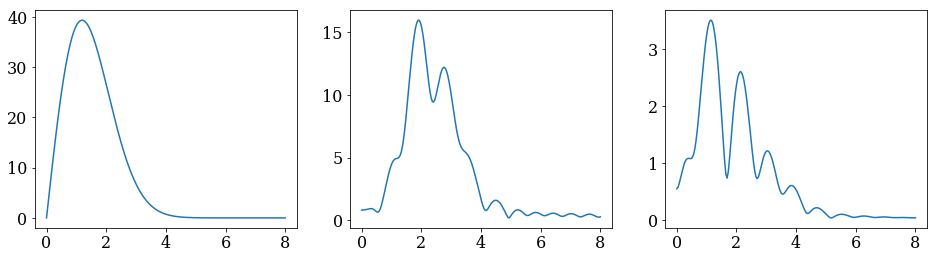

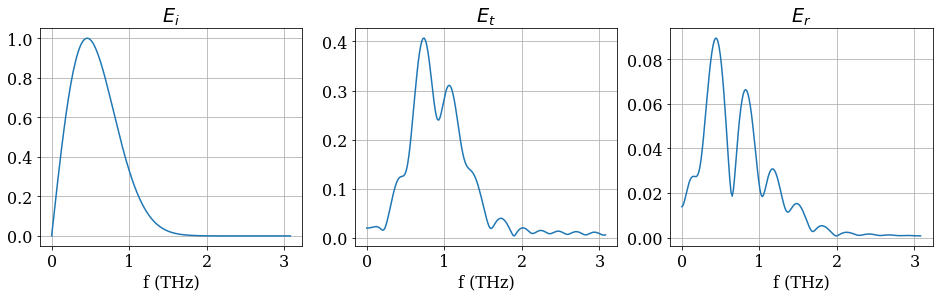

In [27]:

import struct

filename_params = folder+"params{}.param".format(fileSuffix)
paramfile = open(filename_params, mode='rb')
paramsfileContent = paramfile.read()
dtype = (struct.unpack("c", paramsfileContent[0:1])[0]).decode("utf-8") 

print("dtype = ", dtype)
dsize = 0
if dtype=='f':
    dsize = 4
    
assert dsize > 0

ind_dt = 0
dt = struct.unpack(dtype, paramsfileContent[1 + ind_dt*dsize: 1 + (ind_dt + 1)*dsize])[0]
print('dt : ', dt)

ind_unitLength = 3
unitLength = struct.unpack(dtype, paramsfileContent[1 + ind_unitLength*dsize: 1 + (ind_unitLength + 1)*dsize])[0]
print('unitLength : ', unitLength)


def Get_Temporal_Spectrum(E_t, w_max=8.0, Nw=200):
    w = np.linspace(0, w_max, Nw)

    Nt = len(E_t)
    t = np.linspace(0, Nt*dt, Nt)

    E_f = np.zeros(Nw, dtype=complex)

    for i in range(len(w)):
        w_i = w[i]
        E_f[i] = np.sum(E_t * np.exp(-1j*w_i*t))/Nt
    return w, E_f

plt.subplot(131)
w, Ei_f = Get_Temporal_Spectrum(Ei_t)
plot(w, np.abs(Ei_f))
plt.subplot(132)
w, Et_f = Get_Temporal_Spectrum(Et_t)
plot(w, np.abs(Et_f))
plt.subplot(133)
w, Er_f = Get_Temporal_Spectrum(Er_t)
plot(w, np.abs(Er_f))
show()

Ei_f_max = np.max(np.abs(Ei_f))

from scipy import constants
pitch = 124
plt.subplot(131)
plot(w*(constants.c/(unitLength))/constants.tera/(2.0*np.pi), np.abs(Ei_f)/Ei_f_max)
xlabel('f (THz)')
title('$E_i$')
grid()
plt.subplot(132)
plot(w*(constants.c/(unitLength))/constants.tera/(2.0*np.pi), np.abs(Et_f)/Ei_f_max)
xlabel('f (THz)')
title('$E_t$')
grid()
plt.subplot(133)
plot(w*(constants.c/(unitLength))/constants.tera/(2.0*np.pi), np.abs(Er_f)/Ei_f_max)
xlabel('f (THz)')
title('$E_r$')
grid()
savefig(folder + 'E-irt-spectrum.png', bbox_inches='tight', pad_inches=0.5)
show()


In [4]:
%pylab tk

import matplotlib
matplotlib.use("Agg")  ## should be called before importing pylab or pyplot

import numpy as np
from scipy import constants
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import os
from ReadBinary import *


font = {'family' : 'serif', 'weight' : 'normal', 'size' : 14}
matplotlib.rc('font', **font)

folder = "../data/LargePeriodicLattice-GaussianPlasma-TimeSwitched/"

fileList = os.listdir(folder)
resolution = 50

fileList = [name for name in fileList if name.endswith("res={}.param".format(resolution))]
print(fileList)
fileSuffixes = [name[6:-6] for name in fileList]
print(fileSuffixes)

def ReadParams(fileSuffix):
    import struct

    filename_params = folder+"params{}.param".format(fileSuffix)
    paramfile = open(filename_params, mode='rb')
    paramsfileContent = paramfile.read()
    paramfile.close()
    ind_st = 0
    params = []
    while ind_st < len(paramsfileContent):
        dsize = 0
        dtype = (struct.unpack("c", paramsfileContent[ind_st:ind_st+1])[0]).decode("utf-8") 
        dcode = None
        if dtype=='f':
            dsize = 4
            dcode = 'f'
        if dtype=='u':
            dsize = 8
            dcode = 'Q'

        #print('dtype: ', dtype)
        assert dsize > 0 and dcode != None
        ind_data = ind_st + 1
        data_i = struct.unpack(dcode, paramsfileContent[ind_data: ind_data + dsize])[0]
        params.append(data_i)
        ind_st += dsize + 1
        
    dt = params[0]
    dy = params[1]
    dz = params[2]
    unit_length_si = params[3]
    pitch_to_unitlength = params[4]
    fwhm_to_pitch = params[5]
    wp_2p_thz = params[6]
    gamma_thz = params[7]
    wp_switch_dt = params[8]
    sample_rate = params[9]
    return {'dt':dt, 'dy':dy, 'dz':dz, 'unit_length_si':unit_length_si, \
            'pitch_to_unitlength':pitch_to_unitlength, 'fwhm_to_pitch':fwhm_to_pitch, \
            'wp_2p_thz':wp_2p_thz, 'gamma_thz':gamma_thz, \
            'wp_switch_dt':wp_switch_dt, 'sample_rate':sample_rate}


def MakeFolder(fileSuffix):
    params = ReadParams(fileSuffix)
    pitch = params['pitch_to_unitlength']*params['unit_length_si']/constants.micro
    fwhm_to_pitch = params['fwhm_to_pitch']
    fp_thz = params['wp_2p_thz']
    switch_time = params['wp_switch_dt']/(constants.c/params['unit_length_si'])/constants.pico
    f_in = '/fp={:.2f}thz, pitch={:.3f}um, fwhmToPitch={:.2f}, SwitchTime={:.2f}ps'.format(fp_thz, pitch, fwhm_to_pitch, switch_time)
    if fwhm_to_pitch>100.0:
        f_in = '/fp={:.2f}thz, pitch={:.3f}um, fwhmToPitch=inf, SwitchTime={:.2f}ps'.format(fp_thz, pitch, switch_time)
    folder_i = folder + 'resolution={}'.format(resolution) + f_in
    if not os.path.exists(folder_i):
        os.makedirs(folder_i)
    return folder_i + '/'
        

def SaveAnimatedField1(fileSuffix):
    params = ReadParams(fileSuffix)
    folder_i = MakeFolder(fileSuffix)
    dt_ps = params['dt']/(constants.c/params['unit_length_si'])/constants.pico
    dy_um = params['dy']*params['unit_length_si']/constants.micro
    dz_um = params['dz']*params['unit_length_si']/constants.micro
    
    filename_E = folder+"E-x{}.data".format(fileSuffix)
    filename_Wp2 = folder+"Wp2-x{}.data".format(fileSuffix)
    arrayInfo = GetArrayInfo(filename_E)

    E = GetArrays(filename_E, indStart=0, indEnd=None)[:, 0, :, :]
    Wp2 = GetArrays(filename_Wp2, indStart=0, indEnd=None)[:, 0, :, :]
    shape = E.shape[1:]
    
    y_max_um = shape[0]//2*dy_um
    z_max_um = shape[1]//2*dz_um

    plt.imshow(np.real(Wp2[-1, :,:])/np.max(np.abs(Wp2[-1, :,:])), cmap="rainbow", origin='lower', aspect='auto', extent=[-z_max_um, z_max_um, -y_max_um, y_max_um])
    plt.colorbar()
    plt.xlabel(r'$z (\mu m)$')
    plt.ylabel(r'$y (\mu m)$')
    plt.savefig(folder_i + 'plasma.png', bbox_inches='tight', pad_inches=0.5)
    plt.close('all')

    def animate_E(n):
        plt.clf()
        fig = plt.imshow(np.real(E[n, :,:]), cmap="rainbow", origin='lower', aspect='auto', extent=[-z_max_um, z_max_um, -y_max_um, y_max_um])
        plt.colorbar()
        y = np.linspace(-y_max_um, y_max_um, shape[0])
        z = np.linspace(-z_max_um, z_max_um, shape[1])
        Z, Y = np.meshgrid(z, y, indexing='xy')
        plt.contour(Z, Y, np.real(Wp2[n, :,:]), cmap="Greys", linewidths=0.5)
        plt.xlabel(r'$z (\mu m)$')
        plt.ylabel(r'$y (\mu m)$')
        plt.title(r't = {:.3f} ps'.format(n*dt_ps*params['sample_rate']))
        plt.pause(0.05)
        
        return fig
    
    fig = plt.figure(figsize=(7,6*(shape[0]/shape[1])))
    anim = animation.FuncAnimation(fig, animate_E, frames=E.shape[0], interval=1, repeat=False)
    anim.save(folder_i + 'Efield-anim.mp4', writer="ffmpeg", fps=15, dpi=200)

def SaveAnimatedField2(fileSuffix):
    folder_i = MakeFolder(fileSuffix)

    filename_E = folder+"E-x{}.data".format(fileSuffix)
    filename_Wp2 = folder+"Wp2-x{}.data".format(fileSuffix)
    arrayInfo = GetArrayInfo(filename_E)
    
    
    E = GetArrays(filename_E, indStart=0, indEnd=None)[:, 0, :, :]
    Wp2 = GetArrays(filename_Wp2, indStart=0, indEnd=None)[:, 0, :, :]
    shape = E.shape[1:]

    fig = plt.figure(figsize=(6,6))
    cb = None

    ims = []
    for n in np.arange(E.shape[0]):
        ax = plt.imshow(E[n,:,:], cmap="rainbow", origin='lower', aspect='auto')
        if n==0:
            cb = plt.colorbar(ax)
        else:
            cb.update_normal(ax)
        plt.contour(np.real(Wp2[n, :,:]), cmap="Greys", linewidths=0.5)
        plt.xticks([])
        plt.yticks([])
        ims.append((ax,))

    print('{} images added.'.format(E.shape[0]))
    im_ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=3000, blit=False)

    im_ani.save(folder_i + 'Efield-anim.mp4', writer='ffmpeg')
    plt.close(fig)

def SaveAnimatedField3(fileSuffix):
    params = ReadParams(fileSuffix)
    folder_i = MakeFolder(fileSuffix)
    dt_ps = params['dt']/(constants.c/params['unit_length_si'])/constants.pico
    dy_um = params['dy']*params['unit_length_si']/constants.micro
    dz_um = params['dz']*params['unit_length_si']/constants.micro
    
    filename_E = folder+"E-x{}.data".format(fileSuffix)
    filename_Wp2 = folder+"Wp2-x{}.data".format(fileSuffix)
    arrayInfo = GetArrayInfo(filename_E)

    E = GetArrays(filename_E, indStart=0, indEnd=None)[:, 0, :, :]
    Wp2 = GetArrays(filename_Wp2, indStart=0, indEnd=None)[:, 0, :, :]
    shape = E.shape[1:]
    
    y_max_um = shape[0]//2*dy_um
    z_max_um = shape[1]//2*dz_um
    
    plt.rcParams["figure.figsize"] = [7,6*(shape[0]/shape[1])]
    
    plt.imshow(np.real(Wp2[-1, :,:])/np.max(np.abs(Wp2[-1, :,:])), cmap="rainbow", origin='lower', aspect='auto', extent=[-z_max_um, z_max_um, -y_max_um, y_max_um])
    plt.colorbar()
    plt.xlabel(r'$z (\mu m)$')
    plt.ylabel(r'$y (\mu m)$')
    plt.savefig(folder_i + 'plasma.png', bbox_inches='tight', pad_inches=0.5)
    plt.close('all')

    folder_temp = folder_i + "temp/"
    if not os.path.exists(folder_temp):
        os.makedirs(folder_temp)
    
    for n in range(E.shape[0]):
        #plt.figure(figsize=(7,6*(shape[0]/shape[1])))
        #plt.clf()
        plt.imshow(np.real(E[n, :,:]), cmap="rainbow", origin='lower', aspect='auto', extent=[-z_max_um, z_max_um, -y_max_um, y_max_um])
        plt.colorbar()
        y = np.linspace(-y_max_um, y_max_um, shape[0])
        z = np.linspace(-z_max_um, z_max_um, shape[1])
        Z, Y = np.meshgrid(z, y, indexing='xy')
        plt.contour(Z, Y, np.real(Wp2[n, :,:]), cmap="Greys", linewidths=0.5)
        plt.xlabel(r'$z (\mu m)$')
        plt.ylabel(r'$y (\mu m)$')
        plt.title(r't = {:.3f} ps'.format(n*dt_ps*params['sample_rate']))
        plt.savefig(folder_temp + 'img{:04d}.png'.format(n + 1), bbox_inches='tight', pad_inches=0.5)
        plt.close('all')


    import subprocess
    out = subprocess.run(["ffmpeg", "-y", "-r", "15", "-f", "image2", "-s", "800x600", \
                          "-i", folder_temp+"img%04d.png", \
                          "-vcodec", "libx264", "-crf", "24",  "-pix_fmt", "yuv420p", \
                          "-vf", 'pad=ceil(iw/2)*2:ceil(ih/2)*2', folder_temp+"test.mp4"], stdout=subprocess.PIPE, check=True)
    print("ffmpeg: ", out)


def SaveFieldAndSpectrum(fileSuffix):
    params = ReadParams(fileSuffix)
    folder_i = MakeFolder(fileSuffix)
    dt_ps = params['dt']/(constants.c/params['unit_length_si'])/constants.pico
    dy_um = params['dy']*params['unit_length_si']/constants.micro

    wp2 = GetArrays(folder+"Wp2-slice-x{}.data".format(fileSuffix), indStart=0, indEnd=None)[:, 0, :, :]
    Ei = GetArrays(folder+"Ei-x-slice{}.data".format(fileSuffix), indStart=0, indEnd=None)[:, 0, :, :]
    Et = GetArrays(folder+"Et-x-slice{}.data".format(fileSuffix), indStart=0, indEnd=None)[:, 0, :, :]
    Er = GetArrays(folder+"Er-x-slice{}.data".format(fileSuffix), indStart=0, indEnd=None)[:, 0, :, :]
    print("shape: ", Et.shape)

    shape = Et.shape[1:]
    wp2_ty = wp2[:, :, 0]
    wp2_t = np.sum(wp2_ty, axis=1)
    ind_switch = np.argmax(wp2_t)
    Ei_ty = Ei[:, :, 0]
    Et_ty = Et[:, :, 0]
    Er_ty = Er[:, :, 0]
    ind_t_start = np.argmax(np.abs(np.sum(Et_ty, axis=1)) > 0.1*np.max(np.abs(np.sum(Et_ty, axis=1))))
    print("ind_t_start : ", ind_t_start)

    N_pts = 25
    Ei_ty_chopped = Ei_ty[:ind_switch, :]
    Et_ty_chopped = Et_ty[ind_t_start:, :]
    Er_ty_chopped = Er_ty[ind_t_start:, :]

    #plt.figure(figsize=(16, 5))
    plt.rcParams["figure.figsize"] = [16, 5]
    plt.subplot(131)
    t_extent = Ei_ty_chopped.shape[0]*dt_ps
    y_extent = Ei_ty_chopped.shape[1]*dy_um
    plt.imshow(np.real(Ei_ty_chopped).T, cmap="rainbow", origin='lower', aspect='auto', extent=[0.0, t_extent, 0.0, y_extent])
    plt.colorbar()
    plt.title(r'$E^I$')
    plt.xlabel(r't (ps)')
    plt.ylabel(r'$y (\mu m)$')
    plt.subplot(132)
    t_extent = Et_ty_chopped.shape[0]*dt_ps
    plt.imshow(np.real(Et_ty_chopped).T, cmap="rainbow", origin='lower', aspect='auto', extent=[0.0, t_extent, 0.0, y_extent])
    plt.colorbar()
    plt.title(r'$E^T$')
    plt.xlabel(r't (ps)')
    plt.yticks([])
    plt.subplot(133)
    t_extent = Er_ty_chopped.shape[0]*dt_ps
    plt.imshow(np.real(Er_ty_chopped).T, cmap="rainbow", origin='lower', aspect='auto', extent=[0.0, t_extent, 0.0, y_extent])
    plt.colorbar()
    plt.title(r'$E^R$')
    plt.xlabel(r't (ps)')
    plt.yticks([])
    plt.savefig(folder_i + 'E-irt.png', bbox_inches='tight', pad_inches=0.5)
    plt.close('all')


    Nt_i, Ny = Ei_ty_chopped.shape
    Nt_tr = Et_ty_chopped.shape[0]
    Ei_f_ty = np.fft.fftshift(np.fft.fft2(Ei_ty_chopped))[Nt_i//2-N_pts:Nt_i//2+N_pts, Ny//2-N_pts:Ny//2+N_pts]
    Et_f_ty = np.fft.fftshift(np.fft.fft2(Et_ty_chopped))[Nt_tr//2-N_pts:Nt_tr//2+N_pts, Ny//2-N_pts:Ny//2+N_pts]
    Er_f_ty = np.fft.fftshift(np.fft.fft2(Er_ty_chopped))[Nt_tr//2-N_pts:Nt_tr//2+N_pts, Ny//2-N_pts:Ny//2+N_pts]
    Ei_f_ty_max = np.max(np.abs(Ei_f_ty))
    Ei_f_ty /= Ei_f_ty_max
    Er_f_ty /= Ei_f_ty_max
    Et_f_ty /= Ei_f_ty_max
    

    ind_w0 = np.abs(N_pts - np.argmax(np.sum(np.abs(Ei_f_ty), axis=1)))
    print('ind_w0 : ', ind_w0, '  Nt_i: ', Nt_i)
    
    interpolation="bicubic"
    #plt.figure(figsize=(16, 5))
    plt.rcParams["figure.figsize"] = [16, 5]
    plt.subplot(131)
    w_extent = N_pts/ind_w0
    plt.imshow(np.abs(Ei_f_ty), cmap="rainbow", origin='lower', aspect='auto', interpolation=interpolation, extent=[-w_extent, w_extent, -w_extent, w_extent])
    plt.colorbar()
    plt.title(r'$E^I$')
    plt.xlabel(r'$k_yc/\omega_0$')
    plt.ylabel(r'$\omega/\omega_0$')
    plt.subplot(132)
    plt.imshow(np.abs(Et_f_ty), cmap="rainbow", origin='lower', aspect='auto', interpolation=interpolation)
    plt.yticks([])
    plt.colorbar()
    plt.title(r'$E^T$')
    plt.xlabel(r'$k_yc/\omega_0$')
    plt.subplot(133)
    plt.imshow(np.abs(Er_f_ty), cmap="rainbow", origin='lower', aspect='auto', interpolation=interpolation)
    plt.yticks([])
    plt.colorbar()
    plt.title(r'$E^R$')
    plt.xlabel(r'$k_yc/\omega_0$')
    plt.savefig(folder_i + 'E-irt-spectrum.png', bbox_inches='tight', pad_inches=0.5)
    plt.close('all')
    
    #plt.figure(figsize=(10, 5))
    plt.rcParams["figure.figsize"] = [10, 5]
    wp2_t = np.sum(wp2_ty, axis=1)
    wp2_t /= np.max(np.abs(wp2_t))
    Ei_t = np.sum(Ei_ty_chopped, axis=1)
    Ei_t /= np.max(np.abs(Ei_t))
    t_minToMax_ps = np.abs(np.argmax(Ei_t) - np.argmin(Ei_t))*dt_ps
    plt.plot(np.arange(len(wp2_t))*dt_ps, wp2_t)
    plt.plot(np.arange(len(Ei_t))*dt_ps, Ei_t)
    plt.xlabel(r'$t (ps)$')
    plt.title(r'$E^I$ (red) vs switch time (blue), amplitudes normalized')
    plt.savefig(folder_i + 'switchtime.png', bbox_inches='tight', pad_inches=0.5)
    plt.close('all')

for i in range(len(fileSuffixes)):
    SaveAnimatedField1(fileSuffixes[i])
    plt.close('all')
    SaveFieldAndSpectrum(fileSuffixes[i])
    print("{}/{} done!".format(i, len(fileSuffixes)))
plt.close('all')

Populating the interactive namespace from numpy and matplotlib
['params-rot=0-fp=2-gamma=1-pitch=124-fwhmToPitch=0.300000012-swithTime=0.100000001-res=50.param', 'params-rot=0-fp=2-gamma=1-pitch=12.3999996-fwhmToPitch=0.300000012-swithTime=0.100000001-res=50.param', 'params-rot=0-fp=2-gamma=1-pitch=371.999969-fwhmToPitch=0.300000012-swithTime=0.100000001-res=50.param', 'params-rot=0-fp=2-gamma=1-pitch=12.3999996-fwhmToPitch=0.5-swithTime=0.100000001-res=50.param']
['-rot=0-fp=2-gamma=1-pitch=124-fwhmToPitch=0.300000012-swithTime=0.100000001-res=50', '-rot=0-fp=2-gamma=1-pitch=12.3999996-fwhmToPitch=0.300000012-swithTime=0.100000001-res=50', '-rot=0-fp=2-gamma=1-pitch=371.999969-fwhmToPitch=0.300000012-swithTime=0.100000001-res=50', '-rot=0-fp=2-gamma=1-pitch=12.3999996-fwhmToPitch=0.5-swithTime=0.100000001-res=50']


/home/nima/.local/lib/python3.6/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


ffmpeg:  CompletedProcess(args=['ffmpeg', '-y', '-r', '15', '-f', 'image2', '-s', '800x600', '-i', '../data/LargePeriodicLattice-GaussianPlasma-TimeSwitched/resolution=50/fp=2.00thz, pitch=124.000um, fwhmToPitch=0.30, SwitchTime=0.04ps/temp/img%04d.png', '-vcodec', 'libx264', '-crf', '24', '-pix_fmt', 'yuv420p', '-vf', 'pad=ceil(iw/2)*2:ceil(ih/2)*2', '../data/LargePeriodicLattice-GaussianPlasma-TimeSwitched/resolution=50/fp=2.00thz, pitch=124.000um, fwhmToPitch=0.30, SwitchTime=0.04ps/temp/test.mp4'], returncode=0, stdout=b'')
shape:  (2538, 801, 1)
ind_t_start :  1245
ind_w0 :  2   Nt_i:  775
0/4 done!


/home/nima/.local/lib/python3.6/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


ffmpeg:  CompletedProcess(args=['ffmpeg', '-y', '-r', '15', '-f', 'image2', '-s', '800x600', '-i', '../data/LargePeriodicLattice-GaussianPlasma-TimeSwitched/resolution=50/fp=2.00thz, pitch=12.400um, fwhmToPitch=0.30, SwitchTime=0.04ps/temp/img%04d.png', '-vcodec', 'libx264', '-crf', '24', '-pix_fmt', 'yuv420p', '-vf', 'pad=ceil(iw/2)*2:ceil(ih/2)*2', '../data/LargePeriodicLattice-GaussianPlasma-TimeSwitched/resolution=50/fp=2.00thz, pitch=12.400um, fwhmToPitch=0.30, SwitchTime=0.04ps/temp/test.mp4'], returncode=0, stdout=b'')
shape:  (2538, 801, 1)
ind_t_start :  1307
ind_w0 :  2   Nt_i:  775
1/4 done!


/home/nima/.local/lib/python3.6/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


ffmpeg:  CompletedProcess(args=['ffmpeg', '-y', '-r', '15', '-f', 'image2', '-s', '800x600', '-i', '../data/LargePeriodicLattice-GaussianPlasma-TimeSwitched/resolution=50/fp=2.00thz, pitch=372.000um, fwhmToPitch=0.30, SwitchTime=0.04ps/temp/img%04d.png', '-vcodec', 'libx264', '-crf', '24', '-pix_fmt', 'yuv420p', '-vf', 'pad=ceil(iw/2)*2:ceil(ih/2)*2', '../data/LargePeriodicLattice-GaussianPlasma-TimeSwitched/resolution=50/fp=2.00thz, pitch=372.000um, fwhmToPitch=0.30, SwitchTime=0.04ps/temp/test.mp4'], returncode=0, stdout=b'')
shape:  (2538, 801, 1)
ind_t_start :  1233
ind_w0 :  2   Nt_i:  775
2/4 done!


/home/nima/.local/lib/python3.6/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


ffmpeg:  CompletedProcess(args=['ffmpeg', '-y', '-r', '15', '-f', 'image2', '-s', '800x600', '-i', '../data/LargePeriodicLattice-GaussianPlasma-TimeSwitched/resolution=50/fp=2.00thz, pitch=12.400um, fwhmToPitch=0.50, SwitchTime=0.04ps/temp/img%04d.png', '-vcodec', 'libx264', '-crf', '24', '-pix_fmt', 'yuv420p', '-vf', 'pad=ceil(iw/2)*2:ceil(ih/2)*2', '../data/LargePeriodicLattice-GaussianPlasma-TimeSwitched/resolution=50/fp=2.00thz, pitch=12.400um, fwhmToPitch=0.50, SwitchTime=0.04ps/temp/test.mp4'], returncode=0, stdout=b'')
shape:  (2696, 801, 1)
ind_t_start :  1409
ind_w0 :  2   Nt_i:  775
3/4 done!
